# Modulo 10 Tarea
### Katlyn Mackness
29/07/24

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("PopulationIndicators.csv", encoding='latin1')

# Limpiar los datos
df.columns = ["Region/Country/Area", "Population growth and indicators of fertility and mortality",
              "Year", "Series", "Value", "Footnotes", "Source"]
df = df.iloc[1:].reset_index(drop=True)

df['Year'] = df['Year'].astype(int)
df['Value'] = df['Value'].replace(',','', regex=True).astype(float)
df

,Region/Country/Area,Population growth and indicators of fertility and mortality,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254.0,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,NaN,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
6751,722,SIDS,2022,Total fertility rate (children per women),2.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6752,722,SIDS,2022,"Infant mortality for both sexes (per 1,000 liv...",27.3,Projected estimate (medium fertility variant).,"United Nations Statistics Division, New York, ..."
6753,722,SIDS,2022,Life expectancy at birth for both sexes (years),72.5,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
6754,722,SIDS,2022,Life expectancy at birth for males (years),69.6,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


[Text(0, 0.5, 'Life expentency at birth for both sexes (years)'),
 Text(0.5, 0, 'Infant mortality for both sexes (per 1,000 live births)')]

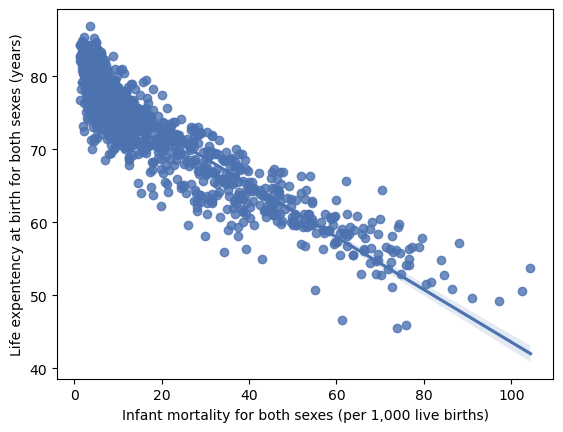

In [221]:
# Using graphs of your choice 
# show the relationship between infant mortality for both sexes
# and life expectancy at birth for both sexes 
# for the year 2020. 

year = df.query('Year == 2020')
infant_mortality = df.query('Series == "Infant mortality for both sexes (per 1,000 live births)"')["Value"]
life_expectancy = df.query('Series == "Life expectancy at birth for both sexes (years)"')["Value"]

fig, ax = plt.subplots()
sns.regplot(y = life_expectancy, x = infant_mortality, data = year, ax=ax)
ax.set(ylabel = "Life expentency at birth for both sexes (years)", 
       xlabel = "Infant mortality for both sexes (per 1,000 live births)")


In [227]:
year = df.query('Year == 2020')
infant_mortality = year.query('Series == "Infant mortality for both sexes (per 1,000 live births)"')["Value"]
life_expectancy = year.query('Series == "Life expectancy at birth for both sexes (years)"')["Value"]
fertility_rate = year.query('Series == "Total fertility rate (children per women)"')["Value"]
maternal_mortality = year.query('Series == "Maternal mortality ratio (deaths per 100,000 population)"')["Value"]
population_increase = year.query('Series == "Population annual rate of increase (percent)"')["Value"]

[Text(0.5, 0, 'Population increase %')]

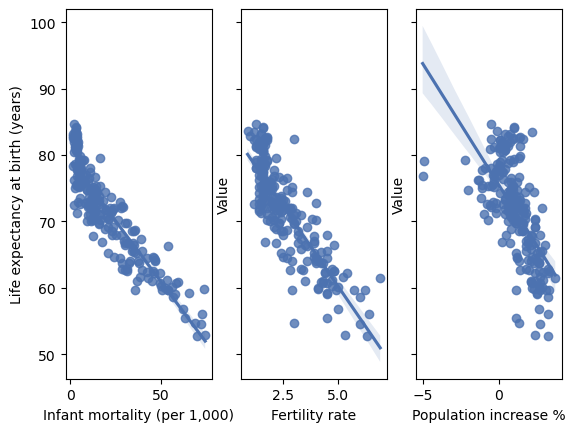

In [244]:
# Comparar otros variables para buscar mas correlaciones
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 1, ncols = 3, sharey = True)
sns.regplot(x = infant_mortality, y = life_expectancy, data = year, ax=ax0)
sns.regplot(x = fertility_rate, y = life_expectancy, data = year, ax=ax1)
sns.regplot(x = population_increase, y = life_expectancy, data = year, ax=ax2)
ax0.set(ylabel = "Life expectancy at birth (years)",
       xlabel = "Infant mortality (per 1,000)")
ax1.set(xlabel = "Fertility rate")
ax2.set(xlabel = "Population increase %")